# Cleaning Raw Data

### The script below it is just following the instructions of this wonderful tutorial  

https://github.com/Sinaxist/mne-python/tree/33146156f2660f122ecc04fa0d5b3fd3c34b549e/tutorials

# Artifacts Detection  

This tutorial discusses a couple of major artifacts that most analyses
have to deal with and demonstrates how to detect them.

In [3]:
%matplotlib inline

In [1]:
import numpy as np

import mne
from mne.datasets import sample
from mne.preprocessing import create_ecg_epochs, create_eog_epochs

# getting some data ready
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'

raw = mne.io.read_raw_fif(raw_fname, preload=True)

Opening raw data file /home/vera/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


### Low frequency drifts and line noise

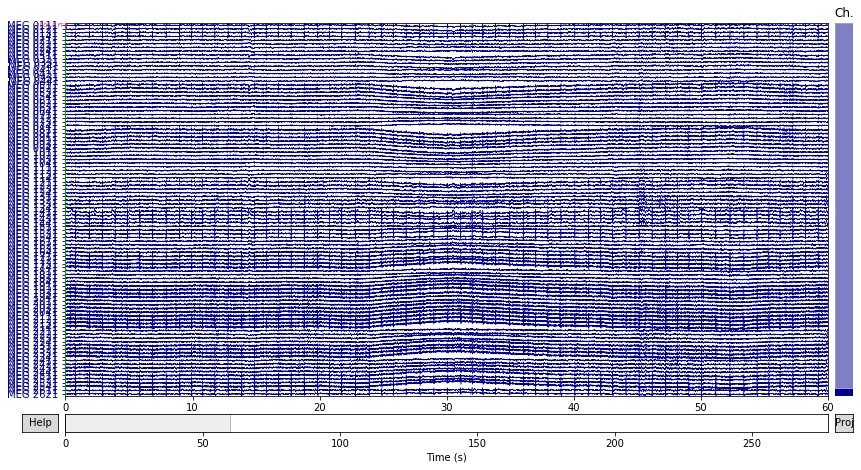

In [4]:
(raw.copy().pick_types(meg='mag')
           .del_proj(0)
           .plot(duration=60, n_channels=100, remove_dc=False));

we see high amplitude undulations in low frequencies, spanning across tens of seconds

Effective window size : 3.410 (s)
Effective window size : 3.410 (s)
Effective window size : 3.410 (s)


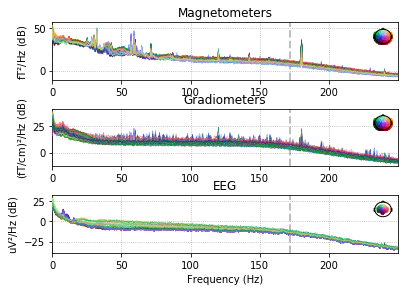

In [5]:
raw.plot_psd(tmax=np.inf, fmax=250);

On MEG sensors we see narrow frequency peaks at 60, 120, 180, 240 Hz, related to line noise.  
But also some high amplitude signals between 25 and 32 Hz, hinting at other biological artifacts such as ECG. These can be most easily detected in the time domain using MNE helper functions

See **:ref:`tut_artifacts_filter`**.

# ECG  
# ---  

finds ECG events, creates epochs, averages and plots

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 8192 samples (13.639 sec)

Number of ECG events detected : 283 (average pulse 61 / min.)
283 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 283 events and 601 original time points ...
0 bad epochs dropped
We found 283 ECG events


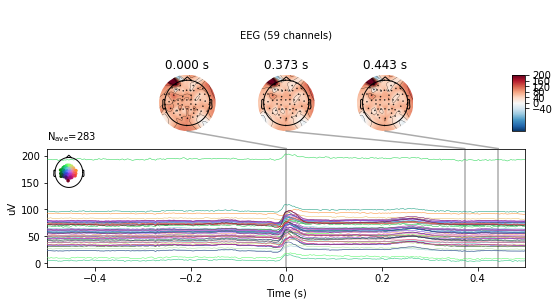

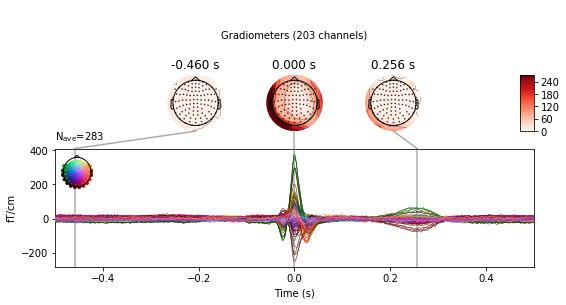

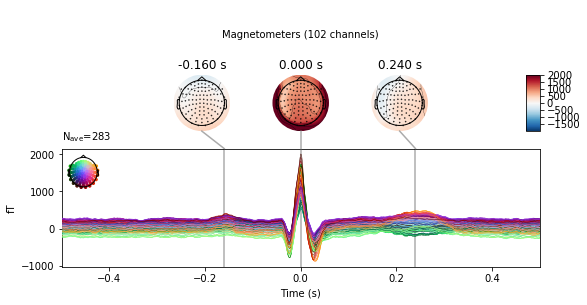

[<Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>]

In [6]:
average_ecg = create_ecg_epochs(raw).average()
print('We found %i ECG events' % average_ecg.nave)
average_ecg.plot_joint()

we can see typical time courses and non dipolar topographies not the order of magnitude of the average artifact related signal and compare this to what you observe for brain signals

# EOG

EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 8192 samples (13.639 sec)

Now detecting blinks and generating corresponding events
Found 46 significant peaks
Number of EOG events detected : 46
46 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 46 events and 601 original time points ...
0 bad epochs dropped
We found 46 EOG events


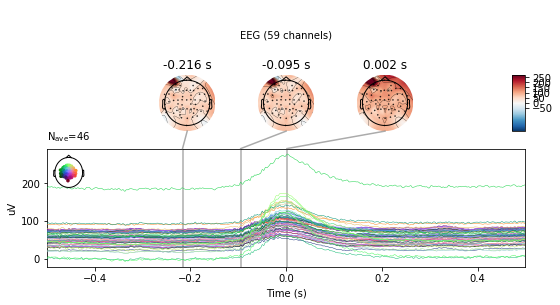

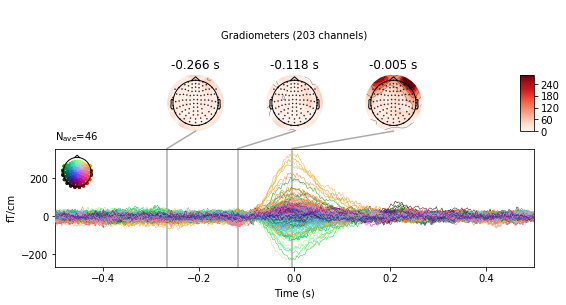

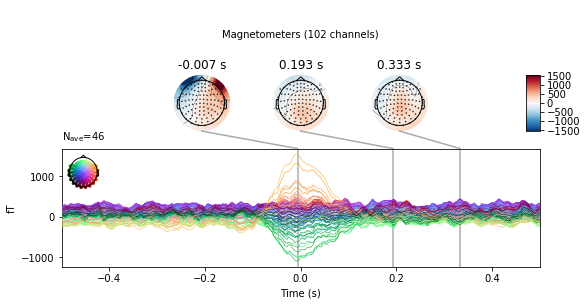

[<Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>]

In [7]:
average_eog = create_eog_epochs(raw).average()
print('We found %i EOG events' % average_eog.nave)
average_eog.plot_joint();

Knowing these artifact patterns is of paramount importance when judging about the quality of artifact removal techniques such as SSP or ICA.
As a rule of thumb you need artifact amplitudes orders of magnitude higher than your signal of interest and you need a few of such events in order to find decompositions that allow you to estimate and remove patterns related to artifacts

Filtering and resampling data
=============================

plot_artifacts_correction_filtering.py
https://github.com/Sinaxist/mne-python/blob/33146156f2660f122ecc04fa0d5b3fd3c34b549e/tutorials/plot_artifacts_correction_filtering.py  

Some artifacts are restricted to certain frequencies and can therefore
be fixed by filtering. An artifact that typically affects only some
frequencies is due to the power line.
Power-line noise is a noise created by the electrical network.
It is composed of sharp peaks at 50Hz (or 60Hz depending on your
geographical location). Some peaks may also be present at the harmonic
frequencies, i.e. the integer multiples of
the power-line frequency, e.g. 100Hz, 150Hz, ... (or 120Hz, 180Hz, ...).
This tutorial covers some basics of how to filter data in MNE-Python.
For more in-depth information about filter design in general and in
MNE-Python in particular, check out **:ref:`tut_background_filtering`.**

In [9]:
%matplotlib inline

In [1]:
import numpy as np
import mne
from mne.datasets import sample

In [2]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
proj_fname = data_path + '/MEG/sample/sample_audvis_eog_proj.fif' #???? what is this and how it was made?

In [3]:
tmin, tmax = 0, 20  # use the first 20s of data

Setup for reading the raw data (save memory by cropping the raw data
before loading it)

In [5]:
raw = mne.io.read_raw_fif(raw_fname)
raw.crop(tmin, tmax).load_data()
raw.info['bads'] = ['MEG 2443', 'EEG 053']  # bads + 2 more How we choose bads channels?

Opening raw data file /home/vera/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 12012  =      0.000 ...    20.000 secs...


In [7]:
fmin, fmax = 2, 300  # look at frequencies between 2 and 300Hz
n_fft = 2048  # the FFT size (n_fft). Ideally a power of 2 (FFT - Fast Fourier Transform)

In [8]:
# Pick a subset of channels (here for speed reason)
selection = mne.read_selection('Left-temporal')
picks = mne.pick_types(raw.info, meg='mag', eeg=False, eog=False,
                       stim=False, exclude='bads', selection=selection)

Effective window size : 3.410 (s)


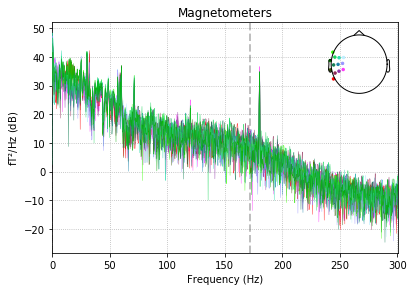

In [11]:
# Let's first check out all channel types
raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False); # Note: power is squared

# Removing power-line noise with notch filtering  
# ----------------------------------------------  

Removing power-line noise can be done with a Notch filter, directly on the  
Raw object, specifying an array of frequency to be cut off:  

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3965 samples (6.602 sec)

Effective window size : 3.410 (s)


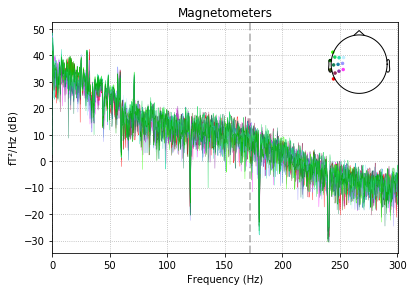

In [13]:
raw.notch_filter(np.arange(60, 241, 60), picks=picks, filter_length='auto',
                 phase='zero')
raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);

# Removing power-line noise with low-pass filtering  
# -------------------------------------------------  

If you're only interested in low frequencies, below the peaks of power-line  
noise you can simply low pass filter the data.

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 159 samples (0.265 sec)

Effective window size : 3.410 (s)


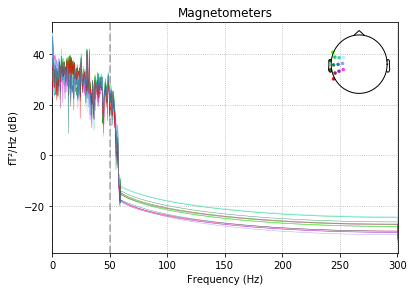

In [16]:
# low pass filtering below 50 Hz
raw.filter(None, 50., fir_design='firwin') # Вырезаем все частоты ниже 50 Гц???
raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);

# High-pass filtering to remove slow drifts
# -----------------------------------------

 To remove slow drifts, you can high pass.

**.. warning::** In several applications such as event-related potential (ERP)
and event-related field (ERF) analysis, high-pass filters with
cutoff frequencies greater than 0.1 Hz are usually considered
problematic since they significantly change the shape of the
resulting averaged waveform (see examples in
**:ref:`tut_filtering_hp_problems`**). In such applications, apply
high-pass filters with caution.

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1983 samples (3.302 sec)

Effective window size : 3.410 (s)


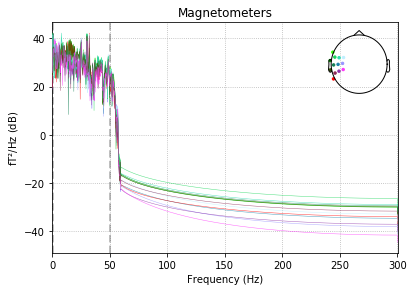

In [17]:
raw.filter(1., None, fir_design='firwin')
raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);

To do the low-pass and high-pass filtering in one step you can do a so-called *band-pass* filter by running the following:

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1983 samples (3.302 sec)

Effective window size : 3.410 (s)


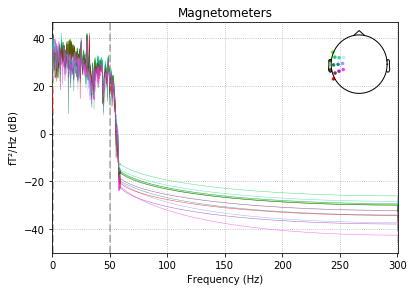

In [18]:
# band-pass filtering in the range 1 Hz - 50 Hz
raw.filter(1, 50., fir_design='firwin')
raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);

# Downsampling and decimation  
# ---------------------------  

When performing experiments where timing is critical, a signal with a high sampling rate is desired. However, having a signal with a much higher sampling rate than necessary needlessly consumes memory and slows down computations operating on the data. To avoid that, you can downsample your time series. Since downsampling raw data reduces the timing precision of events, it is recommended only for use in procedures that do not require optimal precision, e.g. computing EOG or ECG projectors on long recordings.  
**.. note::** A *downsampling* operation performs a low-pass (to prevent aliasing) followed by *decimation*, which selects every            :math:`N^{th}` sample from the signal.  
See   
:func:`scipy.signal.resample` and  
:func:`scipy.signal.resample_poly` for examples.  
Data resampling can be done with *resample* methods.

25 events found
Event IDs: [ 1  2  3  4  5 32]
25 events found
Event IDs: [ 1  2  3  4  5 32]
Effective window size : 10.010 (s)


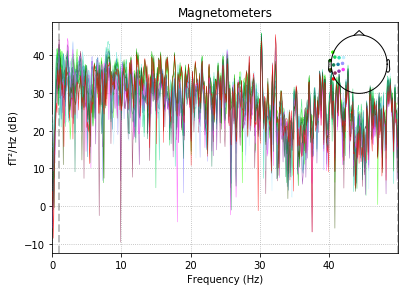

In [20]:
raw.resample(100, npad="auto")  # set sampling frequency to 100Hz
raw.plot_psd(area_mode='range', tmax=10.0, picks=picks);

To avoid this reduction in precision, the suggested pipeline for processing final data to be analyzed is:  

1. low-pass the data with :meth:`mne.io.Raw.filter`.  
2. Extract epochs with :class:`mne.Epochs`.  
3. Decimate the Epochs object using :meth:`mne.Epochs.decimate` or the  ``decim`` argument to the :class:`mne.Epochs` object.  

We also provide the convenience methods    
:meth:`mne.Epochs.resample` and  
:meth:`mne.Evoked.resample` to downsample or upsample data, but these are less optimal because they will introduce edge artifacts into every epoch, whereas filtering the raw data will only introduce edge artifacts only at the start and end of the recording.

# Artifact Correction with ICA

plot_artifacts_correction_ica.py  
https://github.com/Sinaxist/mne-python/blob/33146156f2660f122ecc04fa0d5b3fd3c34b549e/tutorials/plot_artifacts_correction_ica.py

ICA finds directions in the feature space corresponding to projections with high non-Gaussianity. We thus obtain
a decomposition into independent components, and the artifact's contribution is localized in only a small number of components.

These components have to be correctly identified and removed.

If EOG or ECG recordings are available, they can be used in ICA to automatically select the corresponding artifact components from the decomposition. To do so, you have to first build an :class:`mne.Epochs` object around blink or heartbeat events.

ICA is implemented in MNE using the :class:`mne.preprocessing.ICA` class, which we will review here.

In [1]:
import numpy as np

import mne
from mne.datasets import sample

from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs, create_ecg_epochs

In [2]:
# getting some data ready
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'

raw = mne.io.read_raw_fif(raw_fname, preload=True)
# 1Hz high pass is often helpful for fitting ICA
raw.filter(1., 40., n_jobs=2, fir_design='firwin')

raw.info['bads']

Opening raw data file /home/vera/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 497 samples (3.310 sec)



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 132 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 366 out of 366 | elapsed:    2.2s finished


['MEG 2443', 'EEG 053']

In [3]:
picks_meg = mne.pick_types(raw.info, meg=True, eeg=False, eog=False,
                           stim=False, exclude='bads')

Before applying artifact correction please learn about your actual artifacts by reading **:ref:`tut_artifacts_detect`**.  
**.. warning::** ICA is sensitive to low-frequency drifts and therefore requires the data to be high-pass filtered prior to fitting.  
Typically, a cutoff frequency of 1 Hz is recommended. Note that FIR filters prior to MNE 0.15 used the'''firwin2' design method, which generally produces rather shallow filters that might not work for ICA processing. Therefore, it is recommended to use IIR filters for MNE up to 0.14. In MNE 0.15, FIR filters can be designed with the ``'firwin'`` method, which generally produces much steeper filters. This method will be the default FIR design method in MNE 0.16. In MNE 0.15, you need to explicitly set ``fir_design='firwin'`` to use this method. This  is the recommended filter method for ICA preprocessing.

# Fit ICA

In [4]:
# ICA parameters:

n_components = 25  # if float, select n_components by explained variance of PCA
method = 'fastica'  # for comparison with EEGLAB try "extended-infomax" here
decim = 3  # we need sufficient statistics, not all time points -> saves time

In [5]:
# we will also set state of the random number generator - ICA is a
# non-deterministic algorithm, but we want to have the same decomposition
# and the same order of components each time this tutorial is run
random_state = 23

In [6]:
# Define the ICA object instance
ica = ICA(n_components=n_components, method=method, random_state=random_state)
print(ica)

<ICA  |  no decomposition, fit (fastica):  samples, no dimension reduction>


In [7]:
# we avoid fitting ICA on crazy environmental artifacts that would
# dominate the variance and decomposition
reject = dict(mag=5e-12, grad=4000e-13)
ica.fit(raw, picks=picks_meg, decim=decim, reject=reject)
print(ica)


Fitting ICA to data using 305 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
    Rejecting  epoch based on MAG : ['MEG 1711']
Artifact detected in [4242, 4343]
    Rejecting  epoch based on MAG : ['MEG 1711']
Artifact detected in [5858, 5959]
Selection by number: 25 components
Fitting ICA took 3.5s.
<ICA  |  raw data decomposition, fit (fastica): 13635 samples, 25 components, channels used: "mag"; "grad">


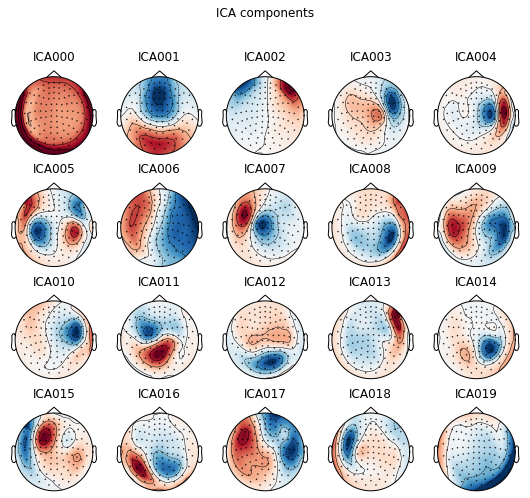

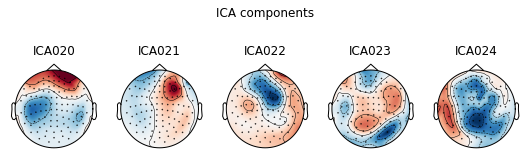

In [10]:
# Plot ICA components
ica.plot_components(); # can you spot some potential bad guys?

# Component properties
# --------------------

Let's take a closer look at properties of first three independent components.

    Rejecting  epoch based on MAG : ['MEG 1711']
Artifact detected in [12642, 12943]
    Rejecting  epoch based on MAG : ['MEG 1711']
Artifact detected in [17458, 17759]
Creating RawArray with float64 data, n_channels=376, n_times=40936
Current compensation grade : 0
    Range : 0 ... 40935 =      0.000 ...   272.621 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
138 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


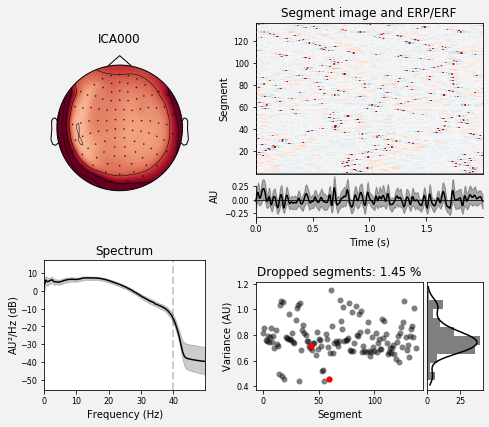

[<Figure size 504x432 with 6 Axes>]

In [11]:
# first, component 0:
ica.plot_properties(raw, picks=0)

    Rejecting  epoch based on MAG : ['MEG 1711']
Artifact detected in [12642, 12943]
    Rejecting  epoch based on MAG : ['MEG 1711']
Artifact detected in [17458, 17759]
Creating RawArray with float64 data, n_channels=376, n_times=40936
Current compensation grade : 0
    Range : 0 ... 40935 =      0.000 ...   272.621 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
138 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


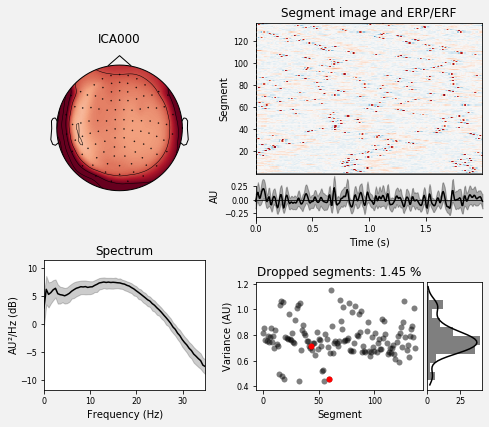

[<Figure size 504x432 with 6 Axes>]

In [12]:
# we can see that the data were filtered so the spectrum plot is not
# very informative, let's change that:
ica.plot_properties(raw, picks=0, psd_args={'fmax': 35.})


In [15]:
# Instead of opening individual figures with component properties, we can
# also pass an instance of Raw or Epochs in ``inst`` arument to
# ``ica.plot_components``. This would allow us to open component properties
# interactively by clicking on individual component topomaps. In the notebook
# this woks only when running matplotlib in interactive mode (``%matplotlib``).

# uncomment the code below to test the inteactive mode of plot_components:
%matplotlib
ica.plot_components(picks=range(10), inst=raw);

Using matplotlib backend: Qt5Agg
    Rejecting  epoch based on MAG : ['MEG 1711']
Artifact detected in [12642, 12943]
    Rejecting  epoch based on MAG : ['MEG 1711']
Artifact detected in [17458, 17759]
Creating RawArray with float64 data, n_channels=376, n_times=40936
Current compensation grade : 0
    Range : 0 ... 40935 =      0.000 ...   272.621 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
138 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
    Rejecting  epoch based on MAG : ['MEG 1711']
Artifact detected in [12642, 12943]
    Rejecting  epoch based on MAG : ['MEG 1711']
Artifact detected in [17458, 17759]
Creating RawArray with float64 data, n_channels=376, n_times=40936
Current compensation grade : 0
    Range : 0 ... 40935 =      0.000 ...   272.621 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
138 matching events found
No baseline correction applie

In [16]:
%matplotlib inline

# Advanced artifact detection
# ---------------------------

Let's use a more efficient way to find artefacts

EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2048 samples (13.639 sec)

Now detecting blinks and generating corresponding events
Found 46 significant peaks
Number of EOG events detected : 46
46 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 46 events and 151 original time points ...
0 bad epochs dropped
EOG channel index for this subject is: [375]
Filtering the dat

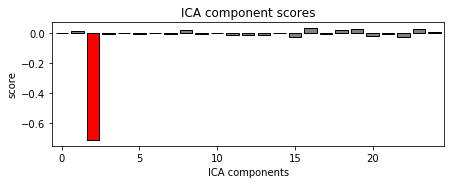

<ipython-input-17-fed11be5e481>:11: DeprecationWarning: The "exclude" parameter is deprecated and will be removed in version 0.20; specify excluded components using the ICA.exclude attribute instead. Provided value of [2] will be ignored; falling back to ICA.exclude
  ica.plot_sources(eog_average, exclude=eog_inds);  # look at source time course


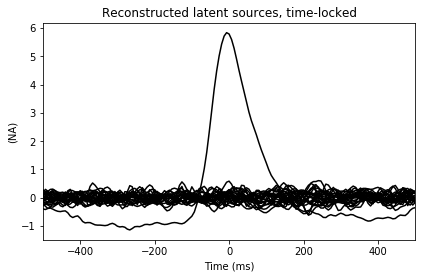

In [17]:
eog_average = create_eog_epochs(raw, reject=dict(mag=5e-12, grad=4000e-13),
                                picks=picks_meg).average()

eog_epochs = create_eog_epochs(raw, reject=reject)  # get single EOG trials
eog_inds, scores = ica.find_bads_eog(eog_epochs)  # find via correlation

ica.plot_scores(scores, exclude=eog_inds);  # look at r scores of components
# we can see that only one component is highly correlated and that this
# component got detected by our correlation analysis (red).

ica.plot_sources(eog_average, exclude=eog_inds);  # look at source time course

We can take a look at the properties of that component, now using the data epoched with respect to EOG events.  
We will also use a little bit of smoothing along the trials axis in the epochs image:

    Using multitaper spectrum estimation with 7 DPSS windows
46 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


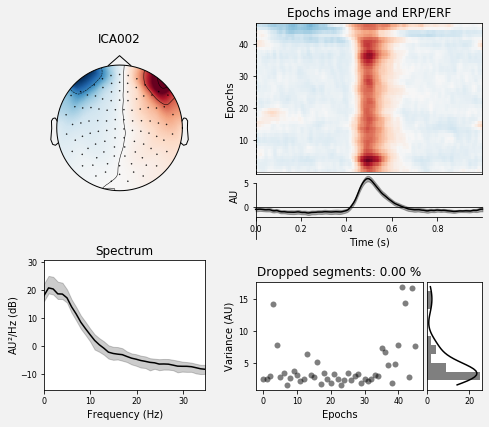

[<Figure size 504x432 with 6 Axes>]

In [18]:
ica.plot_properties(eog_epochs, picks=eog_inds, psd_args={'fmax': 35.},
                    image_args={'sigma': 1.})


That component is showing a **prototypical average vertical EOG time course**.  

ay attention to the labels, a customized read-out of the **``mne.preprocessing.ICA.labels_``**:

In [19]:
print(ica.labels_)

{'eog/0/EOG 061': [2], 'eog': [2]}


These labels were used by the plotters and are added automatically by artifact detection functions. You can also manually edit them to annotate components.

Now let's see how we would modify our signals if we removed this component from the data.

Transforming to ICA space (25 components)
Zeroing out 1 ICA components


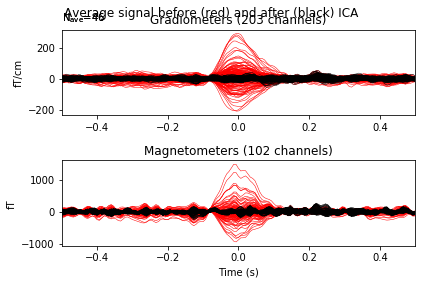

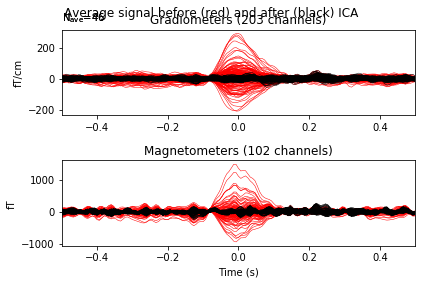

In [36]:
ica.plot_overlay(eog_average, exclude=eog_inds, show=False)
# red -> before, black -> after. Yes! We remove quite a lot!

In [22]:
# to definitely register this component as a bad one to be removed
# there is the ``ica.exclude`` attribute, a simple Python list
ica.exclude.extend(eog_inds)

In [23]:
# from now on the ICA will reject this component even if no excludeica.plot_overlay(eog_average, exclude=eog_inds, shoprint(ica.labels_)w=False);
# parameter is passed, and this information will be stored to disk
# on saving

# uncomment this for reading and writing
# ica.save('my-ica.fif')
# ica = read_ica('my-ica.fif')

Note that nothing is yet removed from the raw data. To remove the effects of the rejected components,
:meth:`the apply method <mne.preprocessing.ICA.apply>` must be called.
Here we apply it on the copy of the first ten seconds, so that the rest of this tutorial still works as intended.

Transforming to ICA space (25 components)
Zeroing out 1 ICA components


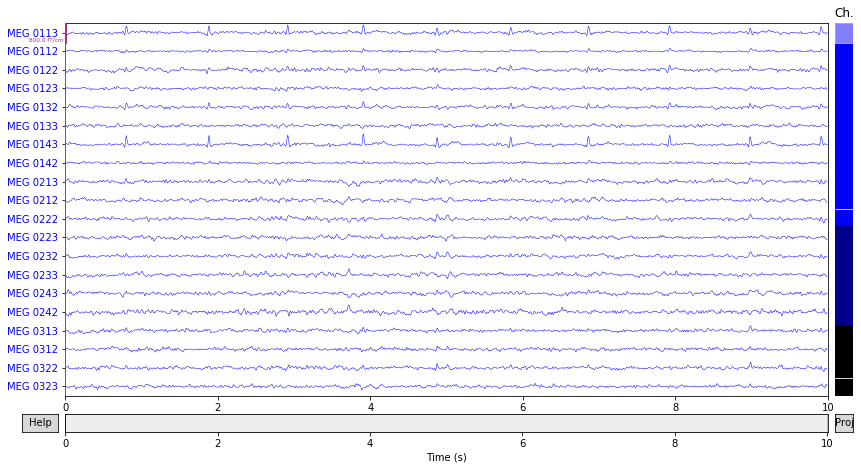

In [25]:
raw_copy = raw.copy().crop(0, 10)
ica.apply(raw_copy)
raw_copy.plot();  # check the resultprint(ica.labels_)

### Exercise: find and remove ECG artifacts using ICA!

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2048 samples (13.639 sec)

Number of ECG events detected : 284 (average pulse 61 / min.)
284 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 4)
Loading data for 284 events and 151 original time points ...
0 bad epochs dropped
Reconstructing ECG signal from Magnetometers


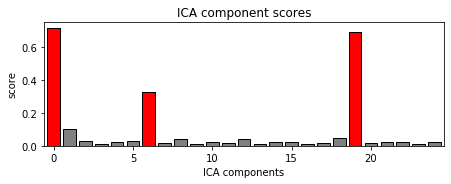

    Using multitaper spectrum estimation with 7 DPSS windows
284 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
284 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
284 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


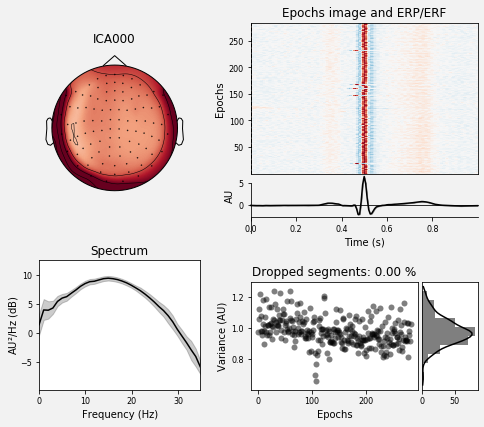

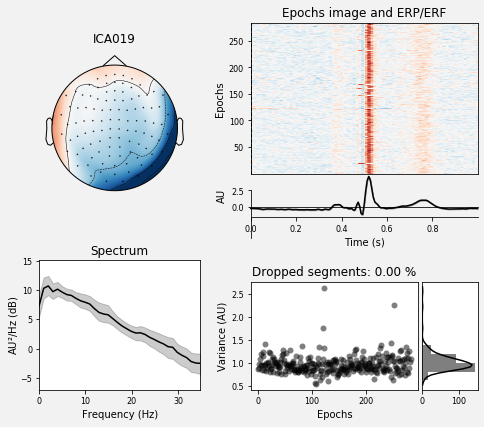

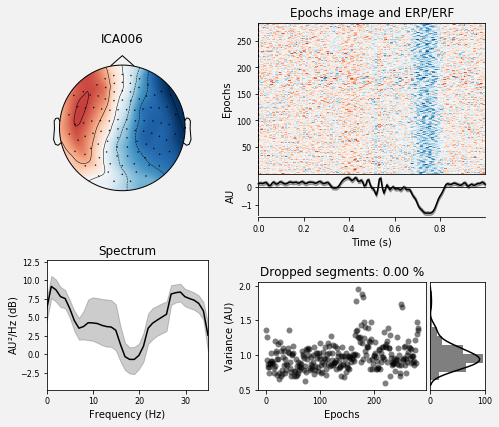

In [31]:
ecg_epochs = create_ecg_epochs(raw, tmin=-.5, tmax=.5)
ecg_inds, scores = ica.find_bads_ecg(ecg_epochs, method='ctps')
ica.plot_scores(scores, exclude=ecg_inds);  # look at r scores of components
# we can see that only one component is highly correlated and that this
# component got detected by our correlation analysis (red).

ica.plot_properties(ecg_epochs, picks=ecg_inds, psd_args={'fmax': 35.});
raw_copy = raw.copy().crop(0, 10)
ica.apply(raw_copy)
raw_copy.plot(); 

In [32]:
print(ica.labels_)

{'eog/0/EOG 061': [2], 'eog': [2], 'ecg': [0, 19, 6], 'ecg/ECG-MAG': [0, 19, 6]}


In [33]:
ecg_average = create_ecg_epochs(raw, reject=dict(mag=5e-12, grad=4000e-13),
                                picks=picks_meg).average()

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2048 samples (13.639 sec)

Number of ECG events detected : 284 (average pulse 61 / min.)
284 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 284 events and 151 original time points ...
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on MAG : ['MEG 1711']
2 bad epochs dropped


Transforming to ICA space (25 components)
Zeroing out 4 ICA components


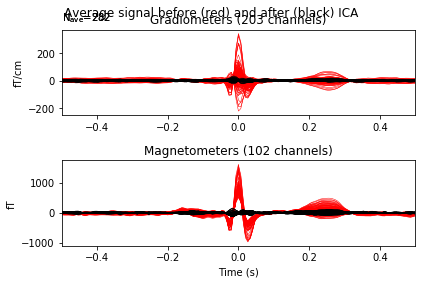

In [37]:
ica.plot_overlay(ecg_average, exclude=ecg_inds, show=False);

Transforming to ICA space (25 components)
Zeroing out 4 ICA components


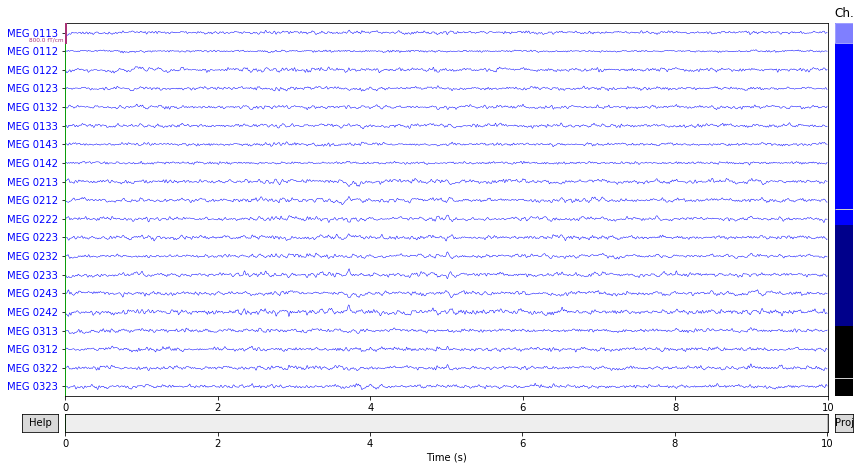

In [38]:
ica.exclude.extend(ecg_inds)
raw_copy = raw.copy().crop(0, 10)
ica.apply(raw_copy)
raw_copy.plot(); 

# Artifact Correction with SSP  

https://github.com/Sinaxist/mne-python/blob/33146156f2660f122ecc04fa0d5b3fd3c34b549e/tutorials/plot_artifacts_correction_ssp.py

In [8]:
import numpy as np

import mne
from mne.datasets import sample
from mne.preprocessing import compute_proj_ecg, compute_proj_eog

# getting some data ready
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'

raw = mne.io.read_raw_fif(raw_fname, preload=True)
raw.set_eeg_reference('average', projection=True)
raw.pick_types(meg=True, ecg=True, eog=True, stim=True)

Opening raw data file /home/vera/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


<ipython-input-8-4781139b8d82>:12: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference('average', projection=True)


<Raw  |  sample_audvis_filt-0-40_raw.fif, n_channels x n_times : 315 x 41700 (277.7 sec), ~103.8 MB, data loaded>

# Compute SSP projections
# -----------------------

Including 4 SSP projectors from raw file
Running ECG SSP computation
Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 2048 samples (13.639 sec)

Number of ECG events detected : 285 (average pulse 61 / min.)
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Lower passband edge: 1.00
- Lower

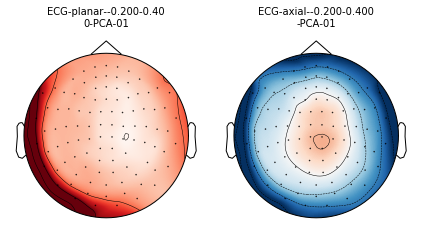

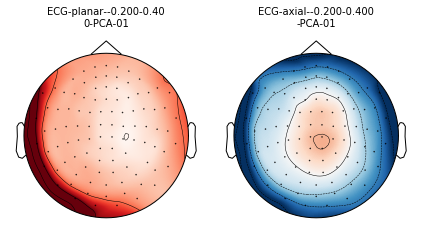

In [9]:
projs, events = compute_proj_ecg(raw, n_grad=1, n_mag=1, average=True)
print(projs)

ecg_projs = projs[-2:]
mne.viz.plot_projs_topomap(ecg_projs);

Including 4 SSP projectors from raw file
Running EOG SSP computation
EOG channel index for this subject is: [314]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2048 samples (13.639 sec)

Now detecting blinks and generating corresponding events
Found 46 significant peaks
Number of EOG events detected : 46
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-ph

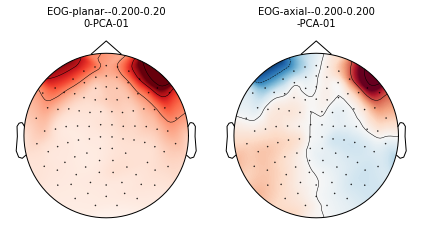

In [10]:
# Now for EOG

projs, events = compute_proj_eog(raw, n_grad=1, n_mag=1, average=True)
print(projs)

eog_projs = projs[-2:]
mne.viz.plot_projs_topomap(eog_projs);

# Apply SSP projections
# ---------------------

MNE is handling projections at the level of the info, so to register them populate the list that you find in the 'proj' field


In [11]:
raw.info['projs'] += eog_projs + ecg_projs

Yes this was it. Now MNE will apply the projs on demand at any later stage, so watch out for proj parmeters in functions or to it explicitly with the **``.apply_proj``** method

# Demonstrate SSP cleaning on some evoked data
# --------------------------------------------

In [12]:
events = mne.find_events(raw, stim_channel='STI 014')
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)
# this can be highly data dependent
event_id = {'auditory/left': 1}

319 events found
Event IDs: [ 1  2  3  4  5 32]


72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 7)
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']


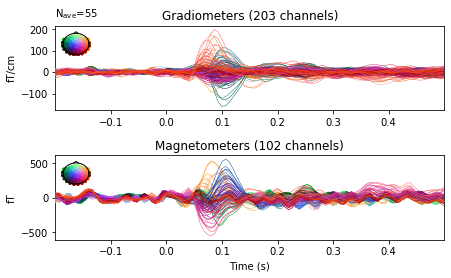

72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 7)
8 projection items activated
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']


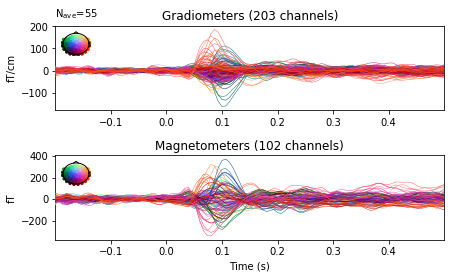

In [13]:
epochs_no_proj = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5,
                            proj=False, baseline=(None, 0), reject=reject)
epochs_no_proj.average().plot(spatial_colors=True);


epochs_proj = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5, proj=True,
                         baseline=(None, 0), reject=reject)
epochs_proj.average().plot(spatial_colors=True);

Looks cool right? It is however often not clear how many components you should take and unfortunately this can have bad consequences as can be seen interactively using the delayed SSP mode:

72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Entering delayed SSP mode.
Created an SSP operator (subspace dimension = 7)
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']


<IPython.core.display.Javascript object>


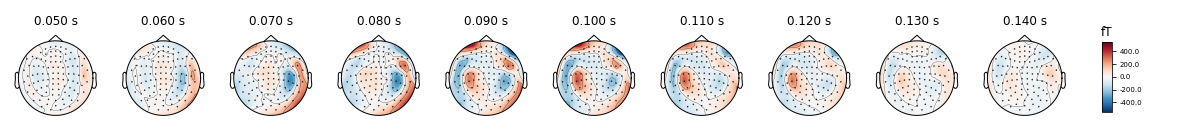

<IPython.core.display.Javascript object>


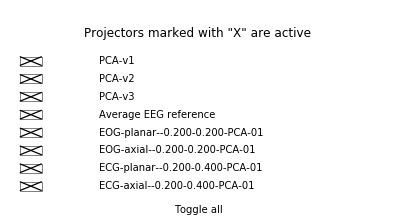

In [15]:
%matplotlib notebook

evoked = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5,
                    proj='delayed', baseline=(None, 0),
                    reject=reject).average()

# set time instants in seconds (from 50 to 150ms in a step of 10ms)
times = np.arange(0.05, 0.15, 0.01)

evoked.plot_topomap(times, proj='interactive');

now you should see checkboxes. Remove a few SSP and see how the auditory pattern suddenly drops off

Rejecting bad data (channels and segments)
==========================================
https://github.com/Sinaxist/mne-python/blob/33146156f2660f122ecc04fa0d5b3fd3c34b549e/tutorials/plot_artifacts_correction_rejection.py

In [11]:
import numpy as np
import mne
from mne.datasets import sample

data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
raw = mne.io.read_raw_fif(raw_fname)
raw.set_eeg_reference('average', projection=True)

Opening raw data file /home/vera/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0


<ipython-input-11-965632494a19>:8: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference('average', projection=True)


<Raw  |  sample_audvis_filt-0-40_raw.fif, n_channels x n_times : 376 x 41700 (277.7 sec), ~3.6 MB, data not loaded>

# Marking bad channels
# --------------------
#
Sometimes some MEG or EEG channels are not functioning properly # for various reasons. These channels should be excluded from analysis by marking them bad as. This is done by setting the 'bads' in the measurement info of a data container object (e.g. Raw, Epochs, Evoked). The **info['bads']** value is a Python string. Here is example:

In [2]:
raw.info['bads'] = ['MEG 2443']

**Why setting a channel bad?**: If a channel does not show a signal at all (flat) it is important to exclude it from the analysis. If a channel as a noise level significantly higher than the other channels it should be marked as bad. Presence of bad channels can have terribe consequences on down stream analysis. For a flat channel some noise estimate will be unrealistically low and thus the current estimate calculations will give a strong weight to the zero signal on the flat channels and will essentially vanish.
Noisy channels can also affect others when signal-space projections or EEG average electrode reference is employed. Noisy bad channels can also adversely affect averaging and noise-covariance matrix estimation by causing unnecessary rejections of epochs.

# Recommended ways to identify bad channels are:

- Observe the quality of data during data acquisition and make notes of observed malfunctioning channels to your measurement protocol sheet.
- View the on-line averages and check the condition of the channels.
- Compute preliminary off-line averages with artifact rejection,    SSP/ICA, and EEG average electrode reference computation off and check the condition of the channels.
- View raw data with :func:`mne.io.Raw.plot` without SSP/ICA  enabled and identify bad channels.  


**.. note::** Setting the bad channels should be done as early as possible in the analysis pipeline. That's why it's recommended to set bad channels the raw objects/files. If present in the raw data files, the bad channel selections will be automatically transferred to averaged files, noise-covariance matrices, forward solution   files, and inverse operator decompositions.

The actual removal happens using :func:`pick_types <mne.pick_types>` with `exclude='bads'` option (see :ref:`picking_channels`).  

###############################################################################   
Instead of removing the bad channels, you can also try to repair them.
This is done by **interpolation** of the data from other channels.
To illustrate how to use channel interpolation let us load some data.


Reading /home/vera/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)


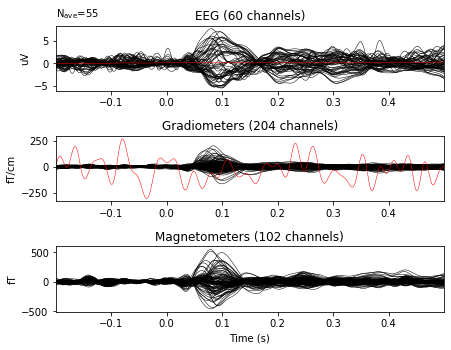

['MEG 2443', 'EEG 053']


In [4]:
%matplotlib inline

# Reading data with a bad channel marked as bad:
fname = data_path + '/MEG/sample/sample_audvis-ave.fif'
evoked = mne.read_evokeds(fname, condition='Left Auditory',
                          baseline=(None, 0))

# restrict the evoked to EEG and MEG channels
evoked.pick_types(meg=True, eeg=True, exclude=[])

# plot with bads
evoked.plot(exclude=[]);

print(evoked.info['bads'])

In [5]:
# Let's now interpolate the bad channels (displayed in red above)
evoked.interpolate_bads(reset_bads=False)


Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
    Computing dot products for 305 coils...
    Computing cross products for coils 305 x 1 coils...
    Preparing the mapping matrix...
    Truncating at 80/305 components to omit less than 0.0001 (9.4e-05)


<Evoked  |  'Left Auditory' (average, N=55), [-0.1998, 0.49949] sec, 366 ch, ~4.8 MB>

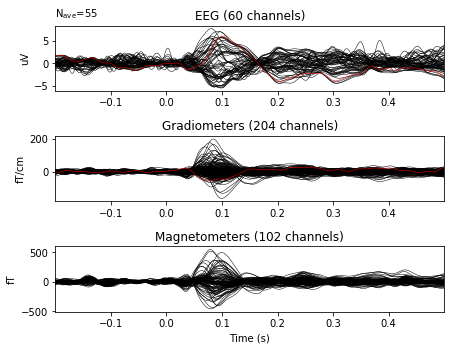

In [7]:
# Let's plot the cleaned data
evoked.plot(exclude=[]);


**.. note::**
Interpolation is a linear operation that can be performed also on Raw and Epochs objects.# For more details on interpolation see the page **:ref:`channel_interpolation`**.

# Marking bad raw segments with annotations  
# -----------------------------------------

MNE provides an :class:`mne.Annotations` class that can be used to mark segments of raw data and to reject epochs that overlap with bad segments of data. The annotations are automatically synchronized with raw data as long as the timestamps of raw data and annotations are in sync.  

See :ref:`sphx_glr_auto_tutorials_plot_brainstorm_auditory.py`  for a long example exploiting the annotations for artifact removal.  

The instances of annotations are created by providing a list of onsets and offsets with descriptions for each segment. The onsets and offsets are marked as seconds. ``onset`` refers to time from start of the data. ``offset`` is the duration of the annotation. The instance of :class:`mne.Annotations` can be added as an attribute of :class:`mne.io.Raw`.

In [14]:
eog_events = mne.preprocessing.find_eog_events(raw)
n_blinks = len(eog_events)
# Center to cover the whole blink with full duration of 0.5s:
onset = eog_events[:, 0] / raw.info['sfreq'] - 0.25 #??????
duration = np.repeat(0.5, n_blinks)
raw.annotations = mne.Annotations(onset, duration, ['bad blink'] * n_blinks,
                                  orig_time=raw.info['meas_date'])
print(raw.annotations)  # to get information about what annotations we have
raw.plot(events=eog_events);  # To see the annotated segments.

EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2048 samples (13.639 sec)

Now detecting blinks and generating corresponding events
Found 46 significant peaks
Number of EOG events detected : 46


AttributeError: can't set attribute

It is also possible to draw bad segments interactively using :meth:`raw.plot <mne.io.Raw.plot>` (see :ref:`tut_viz_raw`).

As the data is epoched, all the epochs overlapping with segments whose description starts with 'bad' are rejected by default. To turn rejection off, use keyword argument ``reject_by_annotation=False`` when constructing :class:`mne.Epochs`. When working with neuromag data, the ``first_samp`` offset of raw acquisition is also taken into account the same way as with event lists. For more see :class:`mne.Epochs` and :class:`mne.Annotations`.

# Rejecting bad epochs
# --------------------

When working with segmented data (Epochs) MNE offers a quite simple approach to automatically reject/ignore bad epochs. This is done by defining thresholds for peak-to-peak amplitude and flat signal detection.

In the following code we build Epochs from Raw object. One of the provided parameter is named *reject*. It is a dictionary where every key is a channel type as a sring and the corresponding values are peak-to-peak rejection parameters (amplitude ranges as floats). Below we define the peak-to-peak rejection values for gradiometers, magnetometers and EOG:

In [15]:
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)

**.. note::**
The rejection values can be highly data dependent. You should be careful  when adjusting these values. Make sure not too many epochs are rejected and look into the cause of the rejections. Maybe it's just a matter of marking a single channel as bad and you'll be able to save a lot of data.

In [16]:
# We then construct the epochs
events = mne.find_events(raw, stim_channel='STI 014')
event_id = {"auditory/left": 1}
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)
baseline = (None, 0)  # means from the first instant to t = 0
picks_meg = mne.pick_types(raw.info, meg=True, eeg=False, eog=True,
                           stim=False, exclude='bads')
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks_meg, baseline=baseline, reject=reject,
                    reject_by_annotation=True)

319 events found
Event IDs: [ 1  2  3  4  5 32]
72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
4 projection items activated


In [17]:
# We then drop/reject the bad epochs
epochs.drop_bad()

Loading data for 72 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
17 bad epochs dropped


<Epochs  |   55 events (all good), -0.199795 - 0.499488 sec, baseline [None, 0], ~3.5 MB, data not loaded,
 'auditory/left': 55>

[[], ['IGNORED'], ['IGNORED'], ['IGNORED'], ['EOG 061']]


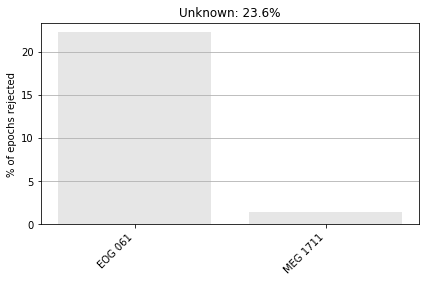

In [19]:
# And plot the so-called *drop log* that details the reason for which some
# epochs have been dropped.

print(epochs.drop_log[40:45])  # only a subset
epochs.plot_drop_log();


What you see is that some drop log values are empty. It means event was kept. If it says 'IGNORED' is means the event_id did not contain the associated event. If it gives the name of channel such as 'EOG 061' it means the epoch was rejected because 'EOG 061' exceeded the peak-to-peak rejection limit.